## Парсинг и анализ данных с сайта lamptest.ru

In [77]:
# базовые библиотеки
import re

import numpy as np
import pandas as pd

# графические библиотеки
import seaborn as sns
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt

color_base = list(mcolors.BASE_COLORS)

from pathlib import Path
DIR_HOME = str(Path.home())

import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.3f}'.format
%matplotlib inline

In [81]:
bulbs = pd.read_csv('src/lamptest-bulbs.csv')

In [82]:
pd.concat([bulbs.head(),
           bulbs.tail()])

,brand,model,desc,base,shape,price,p,lm_prc,lm,eff,...,color,cri,angle,flicker,rating,war,hash_id,color_from_desc,lm_from_desc,w_from_desc
0,iSvet,USL-104-5-6,6500K 5600lm 70W,no,Flood,2218.000,66.000,NaN,NaN,0,...,6782.000,83,NaN,0.000,4.500,24.000,b7bb2bfe207e1aac735a2b223b1e9e3d-0,6500.000,5600.000,70.000
1,Volpe,ULF-Q516 50W/6500K IP65 220-240B GREY,6500K 4000lm 50W,no,Flood,825.000,33.400,44.000,1769.000,53,...,6647.000,84,NaN,100.000,0.300,12.000,b7bb2bfe207e1aac735a2b223b1e9e3d-1,6500.000,4000.000,50.000
2,Volpe,ULF-Q516 30W/6500K IP65 220-240B GREY,6500K 2400lm 30W,no,Flood,560.000,20.300,48.000,1163.000,57,...,6507.000,84,NaN,100.000,0.300,12.000,b7bb2bfe207e1aac735a2b223b1e9e3d-2,6500.000,2400.000,30.000
3,Volpe,ULF-Q516 10W/6500K IP65 220-240B GREY,6500K 800lm 10W,no,Flood,280.000,7.400,65.000,518.000,70,...,6150.000,83,NaN,100.000,0.400,12.000,b7bb2bfe207e1aac735a2b223b1e9e3d-3,6500.000,800.000,10.000
4,Noname,DVOLADOR Dimmable LED COB Downlight,3200K 770lm 7W D,no,Lamp,816.000,5.100,38.000,294.000,58,...,3137.000,92,NaN,0.000,4.200,NaN,b7bb2bfe207e1aac735a2b223b1e9e3d-4,3200.000,770.000,7.000
4019,Civilight,Omni A60 8716,2700K 806lm 11W M,E27,Bulb,714.000,10.000,85.000,682.000,68,...,2741.000,91,299.000,17.000,4.600,NaN,810e2bfd03ff91a7ce457ffa85e52584-19,2700.000,806.000,11.000
4020,Thomson,TL-CD0730EV,3000K 480lm 6.7W M,E14,Candle,270.000,6.500,109.000,525.000,81,...,3125.000,82,159.000,1.000,4.500,NaN,810e2bfd03ff91a7ce457ffa85e52584-20,3000.000,480.000,7.000
4021,Thomson,TL-A601027EV,2700K 806lm 10W M,E27,Bulb,440.000,10.000,96.000,776.000,78,...,2749.000,81,227.000,32.000,3.000,NaN,810e2bfd03ff91a7ce457ffa85e52584-21,2700.000,806.000,10.000
4022,IKEA,402.540.90 E14 LED1216C6,2700K 400lm 7W M,E14,Candle,249.000,6.800,118.000,472.000,69,...,2756.000,90,223.000,63.000,1.000,24.000,810e2bfd03ff91a7ce457ffa85e52584-22,2700.000,400.000,7.000
4023,IKEA,202.225.52 E27 LED1207G11,2700K 600lm 10W M,E27,Bulb,299.000,9.800,98.000,586.000,60,...,2741.000,93,224.000,20.000,3.500,24.000,810e2bfd03ff91a7ce457ffa85e52584-23,2700.000,600.000,10.000


In [83]:
bulbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            4024 non-null   object 
 1   model            4024 non-null   object 
 2   desc             4024 non-null   object 
 3   base             4024 non-null   object 
 4   shape            4024 non-null   object 
 5   price            3418 non-null   float64
 6   p                4024 non-null   float64
 7   lm_prc           3948 non-null   float64
 8   lm               4016 non-null   float64
 9   eff              4024 non-null   int64  
 10  eq               3929 non-null   float64
 11  color            4019 non-null   float64
 12  cri              4024 non-null   int64  
 13  angle            2333 non-null   float64
 14  flicker          3994 non-null   float64
 15  rating           4020 non-null   float64
 16  war              3534 non-null   float64
 17  hash_id       

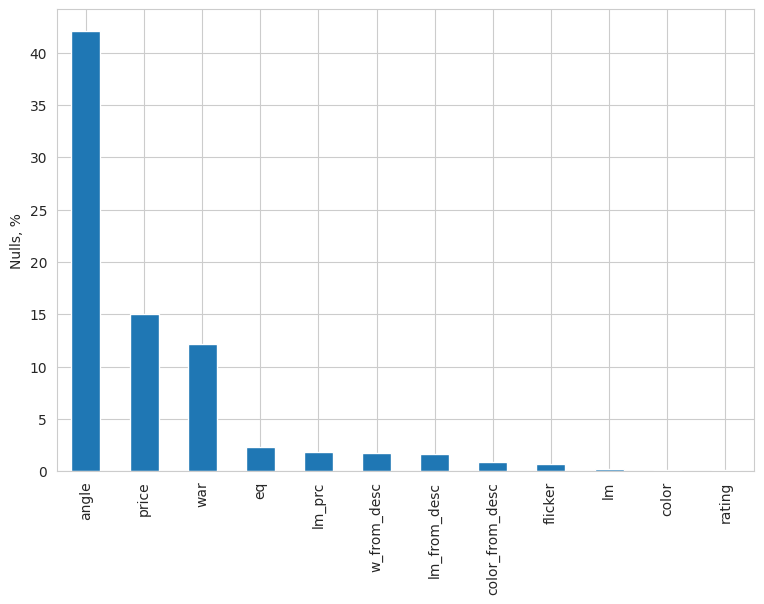

In [85]:
fig, ax = plt.subplots(figsize=(9, 6))
nulls = (100.0 * bulbs.isna().mean()).round(2).sort_values(ascending=False)
nulls[nulls!=0].plot.bar(ax=ax)
ax.set_ylabel("Nulls, %")
plt.show()

### Вычисляем относительное отклонение заявленных параметров

In [86]:
bulbs['color_delta'] = 100.0 * (bulbs['color'] - bulbs['color_from_desc']) / bulbs['color_from_desc']
bulbs['lm_delta'] = 100.0 * (bulbs['lm'] - bulbs['lm_from_desc']) / bulbs['lm_from_desc']
bulbs['p_delta'] = 100.0 * (bulbs['p'] - bulbs['w_from_desc']) / bulbs['w_from_desc']

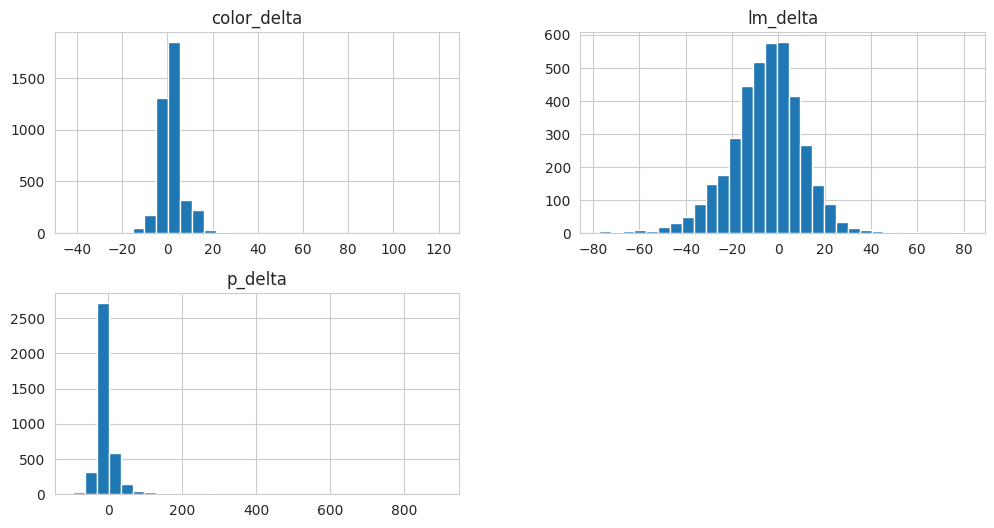

In [80]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=True, ax=ax)
bulbs.hist(column=["color_delta", "lm_delta", 'p_delta'], bins=31, ax=ax)
ax.grid(color='grey', lw=0.25)
plt.show()